<a href="https://colab.research.google.com/gist/jmddutadeo/144b2b97af5c6d7cd88015de36f4ca53/taller_analitica_redes_sociales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Logo de Universidad Jorge Tadeo Lozano](https://www.utadeo.edu.co/sites/tadeo/files/imageblock/horizontal-azul.png) 
#MIAD - TEXT & WEB ANALYTICS Gr-1 2S18
​
##Taller de Analítica de Redes Sociales
​
###Jenny Mayerly Diaz Diaz
###Juan Caros León Medina
​
---
##Actividad
​
1. Descargar un tema tendencia en twitter en español (mínimo 3000 twitters) y realizar analítica sobre el texto de acuerdo a lo realizado en clase

###Librerias y archivos necesarios para la actividad
Instalando librerias

In [0]:
!pip install twython
!pip install wordcloud
!pip install classifier
!pip install spanish_sentiment_analysis
!pip install textblob
!pip install vaderSentiment

Cargando librerias

In [0]:
from twython import Twython
from twython import TwythonStreamer  
import csv
import json
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from wordcloud import WordCloud
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import scipy as sp
from classifier import *
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import time

Descargando paquetes necesarios para la actividad

In [0]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

###Asignado credenciales de twitter

Estas se obtubieron previamente inscribiendose con cuenta de desarrollador en la pagina [https://apps.twitter.com/](https://apps.twitter.com/)

In [0]:
credentials = {}  
credentials['CONSUMER_KEY'] = 'Zb4UwqueN5V1b9OXLi71PbTNl'  
credentials['CONSUMER_SECRET'] = 'Yz7FBTupMqIrvch5FG3MWpxynSxQHb3DHfEfYnbVawko7uDEKc'
credentials['ACCESS_TOKEN'] = '1063213531586314240-Vn6hHj5brotHLUJoLJzNVmX2NhMldz'  
credentials['ACCESS_SECRET'] = 'zvQRagRwODw52lTPvaDkREh6uitsSOeEARELqOspcP7bR'

Se asignan las credenciales

In [0]:
python_tweets = Twython(credentials['CONSUMER_KEY'], credentials['CONSUMER_SECRET'],credentials['ACCESS_TOKEN'],credentials['ACCESS_SECRET'])
#python_tweets = Twython(credentials['ACCESS_TOKEN'],credentials['ACCESS_SECRET'], oauth_version=2)

###Recuperando tweets

Para este trabajo se eligio como tendencia el tema de la ***Final de la Copa Libertadores 2018*** así:

> ***\#final copa libertadores***


<img src="https://e00-co-marca.uecdn.es/claro/assets/multimedia/imagenes/2018/10/31/15409873765300.jpg" width="450" alt="magen de la final copa libertadores 2018 tomada de diario Marce.com">

In [0]:
iterator = python_tweets.cursor(python_tweets.search, q='final copa libertadores', lang='es',count='3000', result_type='recent')
da=[]
for result in iterator:
  da.append(result)
  with open('tweets_fl.txt', 'a') as outfile:
    json.dump(result, outfile, sort_keys = True, indent = 4)

        
print("Numero de tweets recuperados: "+str(len(da)))
print("Listando tweets recuperados: ")


for d in da:
  print(d['text'])

  
#descargar archivo generado
from google.colab import files
files.download('tweets_fl.txt')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: generator 'Twython.cursor' raised StopIteration
  This is separate from the ipykernel package so we can avoid doing imports until


Numero de tweets recuperados: 3998
Listando tweets recuperados: 
RT @ludiablita: ¡DE TERROR! Le pegan bengalas a un nene o nena en su cuerpo para poder pasarlas al estadio. 
________
#River vs #Boca, Fina…
RT @elcomercio_peru: #RiverVsBoca | EPablo Pérez descartado para disputar la final de la Copa Libertadores | VIDEO https://t.co/dNpNpZNa65
RT @SaqueAmargo: "No es la final del mundo muchachos, es la final de la Copa Libertadores de América". GRANDE Marcelo Gallardo poniendo en…
RT @BocaJrsOficial: 📷 ¡Miles de hinchas en la puerta del hotel acompañando al plantel! En minutos, el equipo de Guillermo parte rumbo al Mo…
RT @sebasperiodista: Viajado para los medios de comunicación de Argentina y dueños de los Derechos de TV por parte de Marcelo Gallardo, Dt…
RT @AnaInesMartinez: Acá lo tienen: “Y no es la final del mundo muchachos. Es la final de la Copa Libertadores de América. Un mensaje mucho…
RT @ElDoce: Pablo Pérez sufrió una úlcera en la córnea por el ataque al micro
https://t.co/SS

###Cargando archivo descargado de formato json
Cargar archivo para la actividad

In [0]:
from google.colab import files
uploaded = files.upload()

Saving tweets_fl.txt to tweets_fl.txt


In [0]:
with open('tweets_fl.txt') as f:
  content = f.read()
  content = content.replace('}{','},{')
  search = json.loads('['+content+']')

###Fitrando datos

Se dan caracteristicas al formato JSON de los tweets recuperados



In [0]:
dict_ = {'user': [], 'date': [], 'text': [],'loc':[], 'favorite_count': [],'hashtags':[]}  
for status in search:  
    dict_['user'].append(status['user']['screen_name'])
    dict_['loc'].append(status['user']['location'])
    dict_['date'].append(status['created_at'])
    dict_['text'].append(status['text'])
    dict_['favorite_count'].append(status['favorite_count'])
    dict_['hashtags'].append([hashtag['text'] for hashtag in status['entities']['hashtags']])


print(dict_['text'][2])

@FOXSportsMX debió de haberse suspendido la final de la copa libertadores por falta de garantías a la seguridad dejando al campeón vacante


In [0]:
# Structure data in a pandas DataFrame for easier manipulation
df = pd.DataFrame(dict_)  
df2=df.sort_values(by='favorite_count', ascending=False)   
df2.to_csv('prueba.csv')
df2.head(5)
#descargar archivo generado
from google.colab import files
files.download('prueba.csv')

In [0]:
df.describe()

favorite_count    sentiment
count     9560.000000  9560.000000
mean         0.712029     0.338701
std         12.911976     0.240196
min          0.000000     0.001409
25%          0.000000     0.128541
50%          0.000000     0.294236
75%          0.000000     0.548199
max        674.000000     0.994156

In [0]:
df[df['favorite_count']>22].count()

date              42
favorite_count    42
hashtags          42
loc               42
text              42
user              42
labels            42
dtype: int64

In [0]:
df['text'].str.lower()

0       rt @mauromanila11: en este momento se confirma...
1           media cagaita con la final de la libertadores
2       @foxsportsmx debió de haberse suspendido la fi...
3       rt @diarioole: el pacto #superclásico: boca no...
4       rt @ambarnoticias: ¡de terror! le pegan bengal...
5       rt @laalaann: si mañana suspenden la superliga...
6       rt @patronbermudez: a quien se le pasa por la ...
7       24 de noviembre: la hinchada de river plate no...
8       rt @sopitas: el ataque al autobús de boca no e...
9       rt @eagonzalezg: deberían declarar la final de...
10      rt @facuprieto: - mirá lo podrida que está la ...
11      rt @matiascanillan: mañana cubriremos el inten...
12      rt @mxestadios: estadio azteca inolvidable!\n#...
13      rt @anainesmartinez: acá lo tienen: “y no es l...
14      rt @galanidios: os recuerdo que la conmebol qu...
15      rt @marca: #lomásvisto muy triste, lamentable ...
16      rt @rotela_denis: ojalá tomen ejemplo de cerro...
17      rt @ju

In [0]:
df['text'].str.count('final*')

0       0
1       1
2       1
3       0
4       0
5       0
6       0
7       1
8       0
9       1
10      1
11      1
12      0
13      2
14      1
15      0
16      1
17      2
18      0
19      1
20      1
21      1
22      1
23      0
24      1
25      1
26      2
27      2
28      1
29      2
       ..
9530    1
9531    1
9532    0
9533    0
9534    0
9535    0
9536    2
9537    0
9538    1
9539    0
9540    0
9541    0
9542    1
9543    2
9544    0
9545    1
9546    0
9547    0
9548    1
9549    1
9550    0
9551    2
9552    1
9553    1
9554    2
9555    0
9556    0
9557    0
9558    0
9559    1
Name: text, Length: 9560, dtype: int64

###Preprosesamiento
Palabras más frecuentes

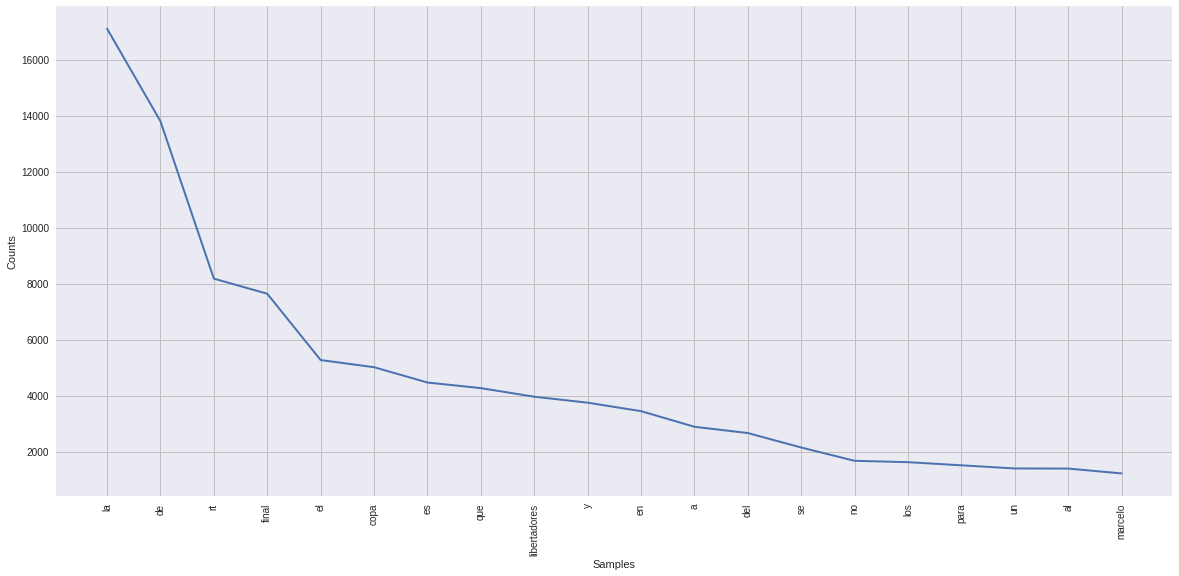

In [0]:
%matplotlib inline
tokens = [t for t in ' '.join(dict_['text']).lower().split()]
plt.figure(figsize = (20,9))
freq = nltk.FreqDist(tokens)
freq.plot(20, cumulative=False)

###Eliminando stopwors de los datos usando nltk
Se utiiza paquete compatible con el idioma español

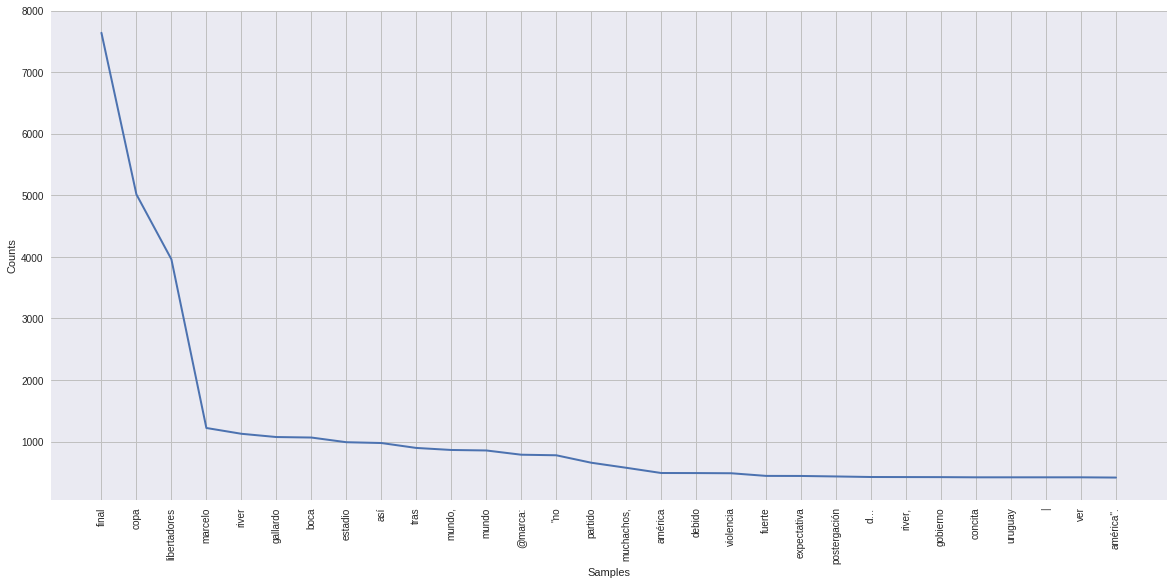

In [0]:
#tokenizer = nltk.data.load('tokenizers/punkt/spanish.pickle')    
#tokens = word_tokenize(' '.join(dict_['text']).lower())

stopWords = set(stopwords.words('spanish')+['rt','https','co'])

clean_tokens = tokens[:]

for token in tokens:
    if token in stopWords:
        clean_tokens.remove(token)

plt.figure(figsize = (20,9))
freq = nltk.FreqDist(clean_tokens)
freq.plot(30, cumulative=False)

###Aplicando steemer
Se eliminan los afijos morfológicos de las palabras, dejando solo la raíz de la palabra con el Natural Language Toolkit (NLTK)

In [0]:
stemmer = SnowballStemmer("spanish")
new_tokens=[stemmer.stem(t)for t in clean_tokens]

#token by ntlk tokenizer
tokenizer = nltk.data.load('tokenizers/punkt/spanish.pickle')    
tokensv2 = word_tokenize(' '.join(dict_['text']).lower())

print(len(set(new_tokens)),len(set(clean_tokens)),len(set(tokens)),len(set(tokensv2)))

4502 5168 5317 4673


###Información adicional con nltk

Palabras dispersas



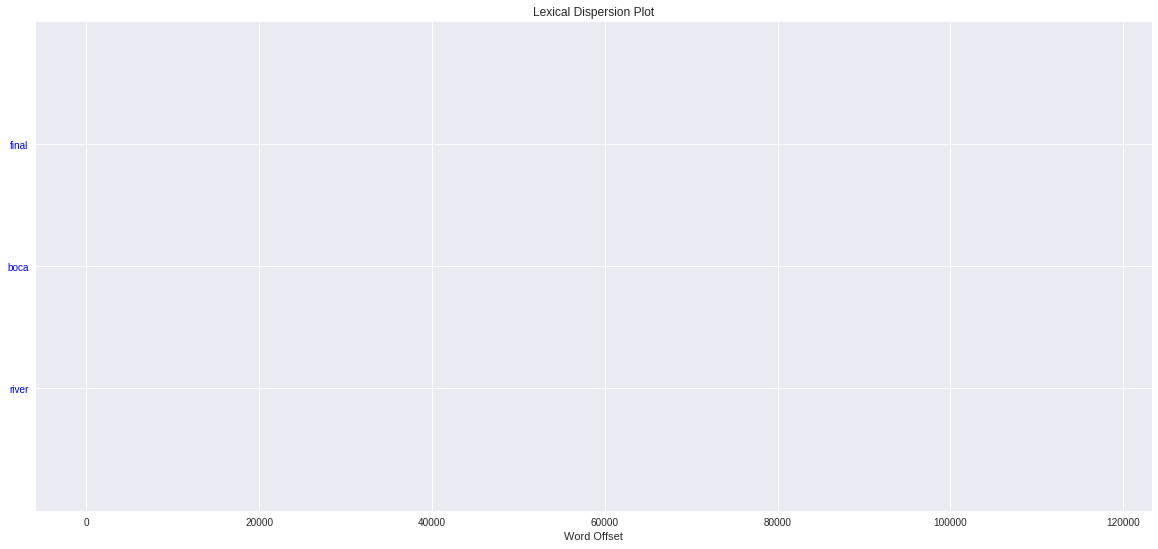

In [0]:
plt.figure(figsize = (20,9))
text=nltk.Text(clean_tokens)
text.dispersion_plot(['final','boca','river'])

### [wordcloud](https://github.com/amueller/word_cloud)

Generando la nube de palabras

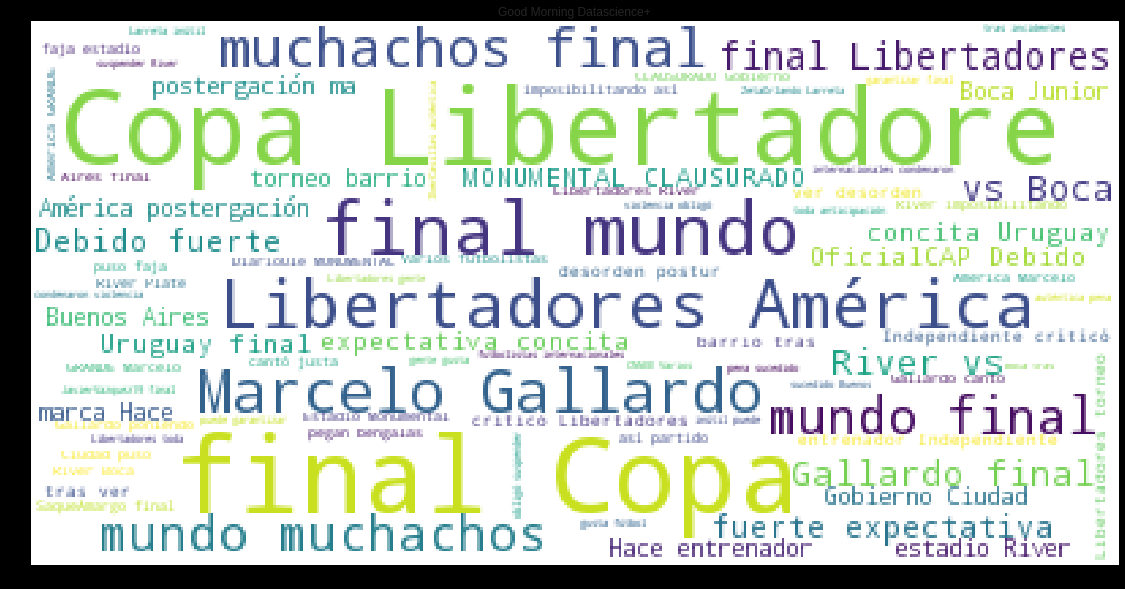

In [0]:
def wordcloud(tweets,col):
    wordcloud = WordCloud(background_color="white",stopwords=stopWords,random_state = 2016).generate(" ".join([i for i in tweets[col]]))
    plt.figure( figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Good Morning Datascience+")
#    image = wordcloud.to_image()
#    image.show()
wordcloud(dict_,'text')  

### Usando Scikit-learn para obtención de palabras

Obteniendo la raiz de las palabras

In [0]:
start = time.time()
#Stemmers remove morphological affixes from words, leaving only the word stem.
stemmer = nltk.stem.SnowballStemmer('spanish')

#modified class to vectorize the words
class StemmedTfidfVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(TfidfVectorizer, self).build_analyzer()
        return lambda doc: (stemmer.stem(w) for w in analyzer(doc))

#vectorizer object
vectorizer = StemmedTfidfVectorizer(min_df=2, max_df=0.5,
                                    stop_words=stopWords, decode_error='ignore',strip_accents ='unicode'
                                    )
vectorized = vectorizer.fit_transform(dict_['text'])
end = time.time()
#print(vectorized)

print("time elapsed",end - start)
num_samples, num_features = vectorized.shape
print("#samples: %d, #features: %d" % (num_samples, num_features))

time elapsed 3.8911352157592773
#samples: 9560, #features: 3112


### Comparando palabras con el post

In [0]:
print(dict_['text'][0])
print('-------------------------------------')
post_v=vectorized[0,:]
post=vectorizer.inverse_transform(post_v)
print(' , '.join(post[0]))

RT @mauromanila11: En este momento se confirma comunicación entre Mauricio Macri y su homólogo Ivan Duque solicitando su colaboración en el…
-------------------------------------
mauromanila11 , moment , confirm , comunicacion , maurici , macri , homolog , ivan , duqu , solicit , colaboracion


### Clustering de los datos con kmeans

Se utilizaron 10 clusters ya que cada uno agrupa por las siguientes tematicas .consignadas en los tweets de mayor tendencia acerca de la Final de la Libertadores, así:

- Final de la libertadores
- Es prudente jugar tras la agresión sufrida
- Es como la final del mundo
- Expectativa por postergación del juego
- Monumental es clausurado
- Pena por lo sucedido
- Critica del enrtenador de Iindependiente
- Fotos del capitan de BocaJuniors
- Medida preventiva quedara levantada el Domingo
- Suspender a River por violencia de seguidores



In [0]:
def post_cluster(num_clusters,verbose=0):
    start = time.time()
    # TODO:remove random state...
    # TODO: change the method
    km = KMeans(n_clusters=num_clusters, n_init=1, verbose=verbose, random_state=3)
    clustered = km.fit(vectorized)
    end = time.time()
    print("time elapsed",end - start)
    print("km.labels_=%s" % set(km.labels_))
    print("km.labels_.shape=%s" % km.labels_.shape)
    return km

km=post_cluster(10,verbose=1)

df=df.assign(labels=km.labels_)

Initialization complete
Iteration  0, inertia 14371.467
Iteration  1, inertia 7858.597
Iteration  2, inertia 7598.807
Iteration  3, inertia 7479.888
Iteration  4, inertia 7393.209
Iteration  5, inertia 7377.352
Iteration  6, inertia 7364.151
Iteration  7, inertia 7358.706
Iteration  8, inertia 7334.716
Iteration  9, inertia 7323.494
Iteration 10, inertia 7323.492
Converged at iteration 10: center shift 0.000000e+00 within tolerance 3.123068e-08
time elapsed 0.9022655487060547
km.labels_={0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
km.labels_.shape=9560


category  0


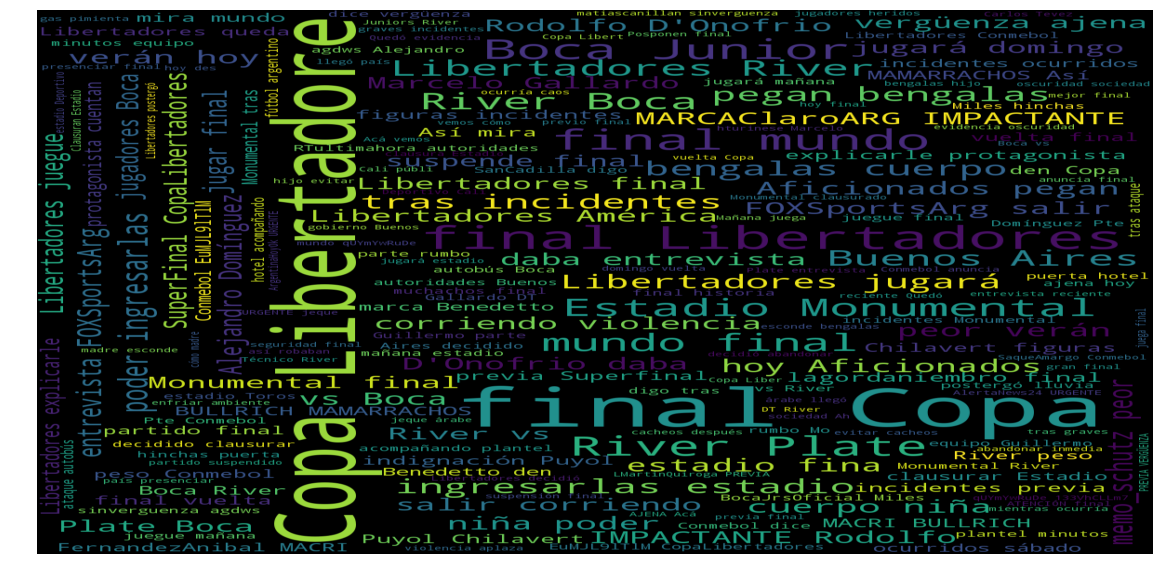

category  1


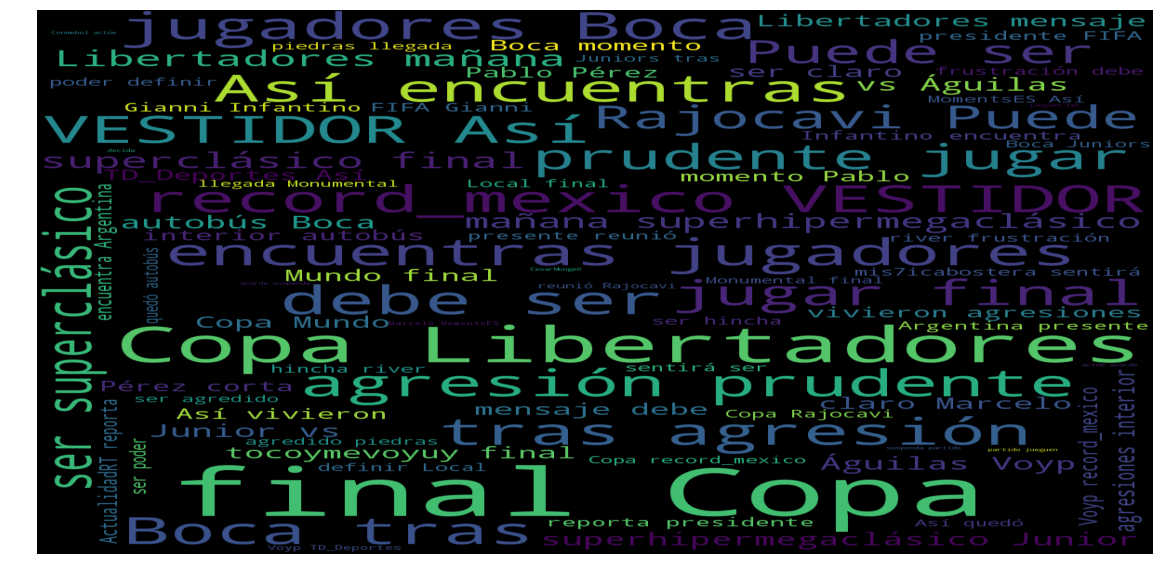

category  2


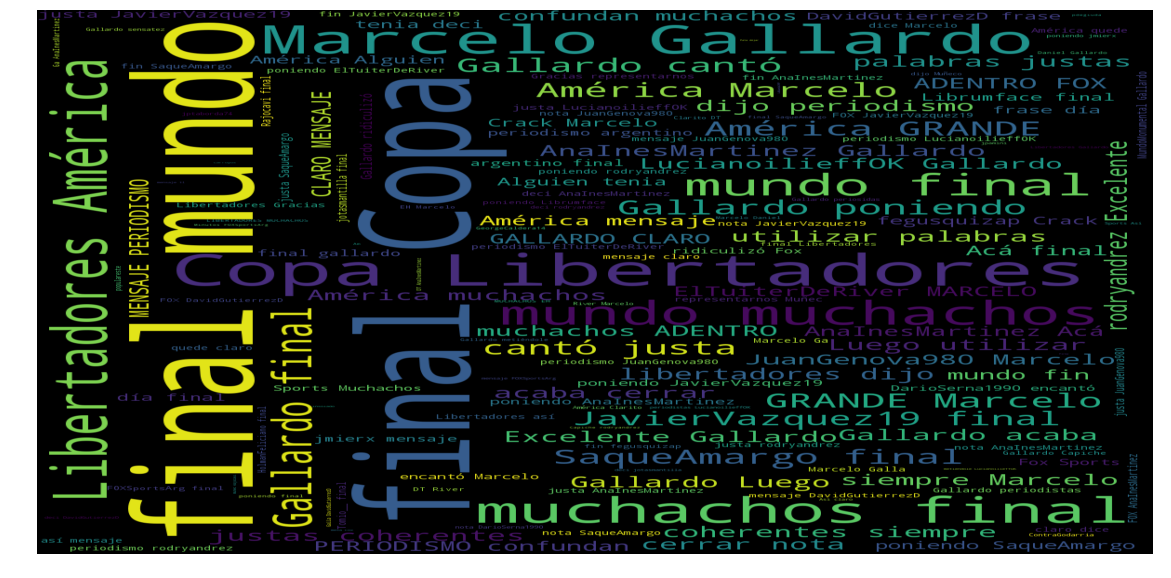

category  3


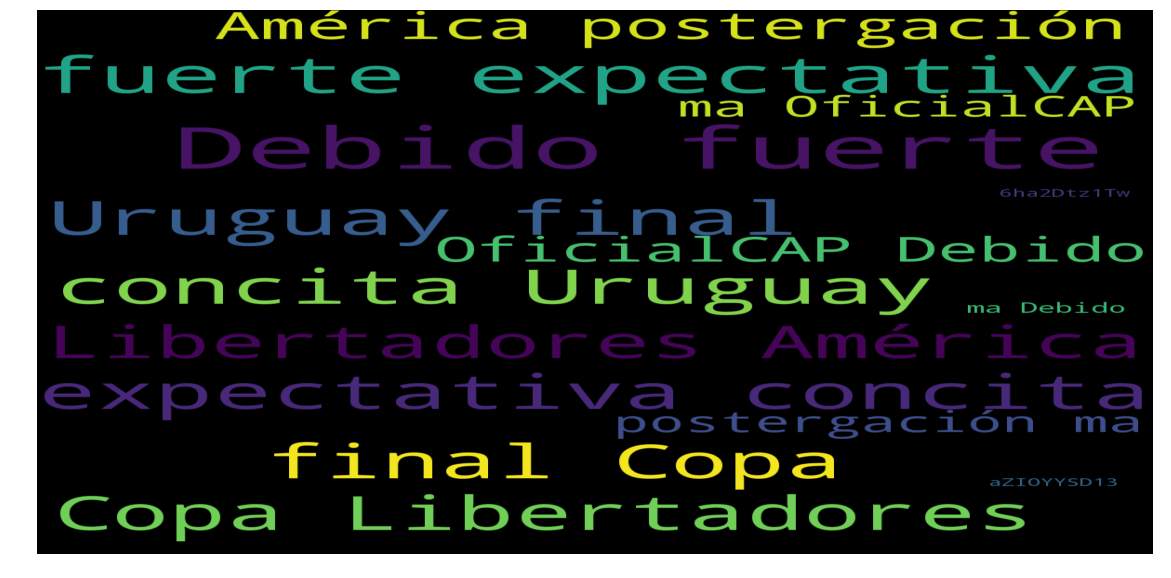

category  4


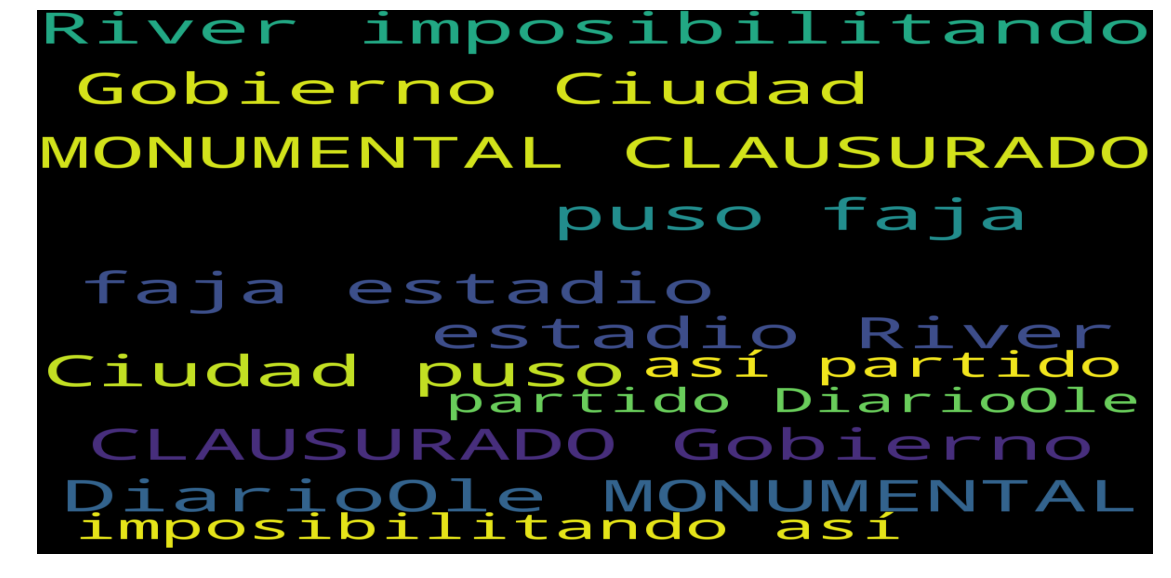

category  5


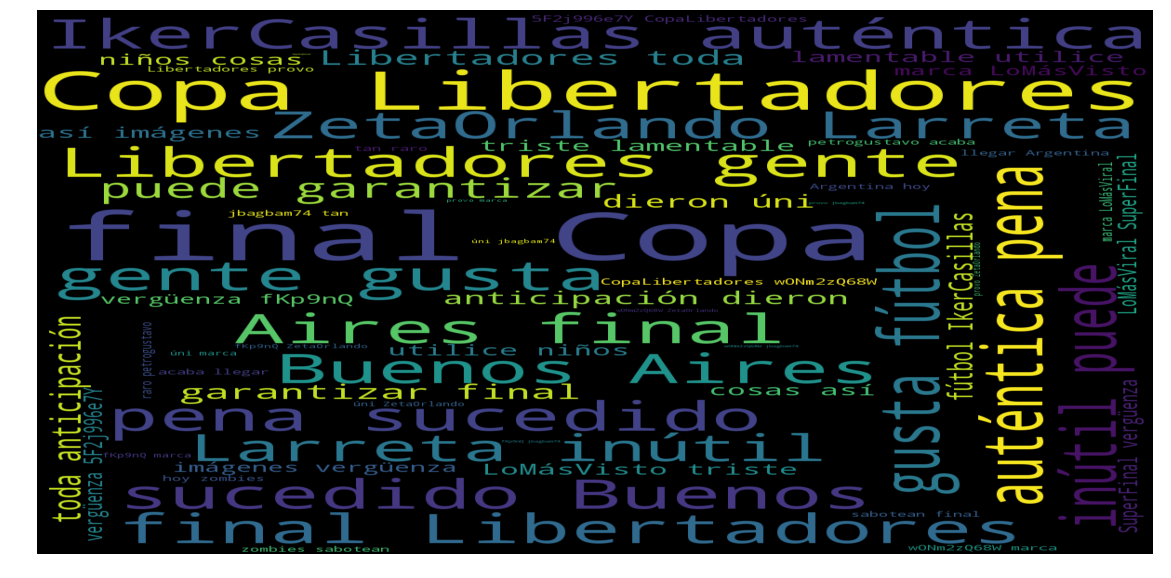

category  6


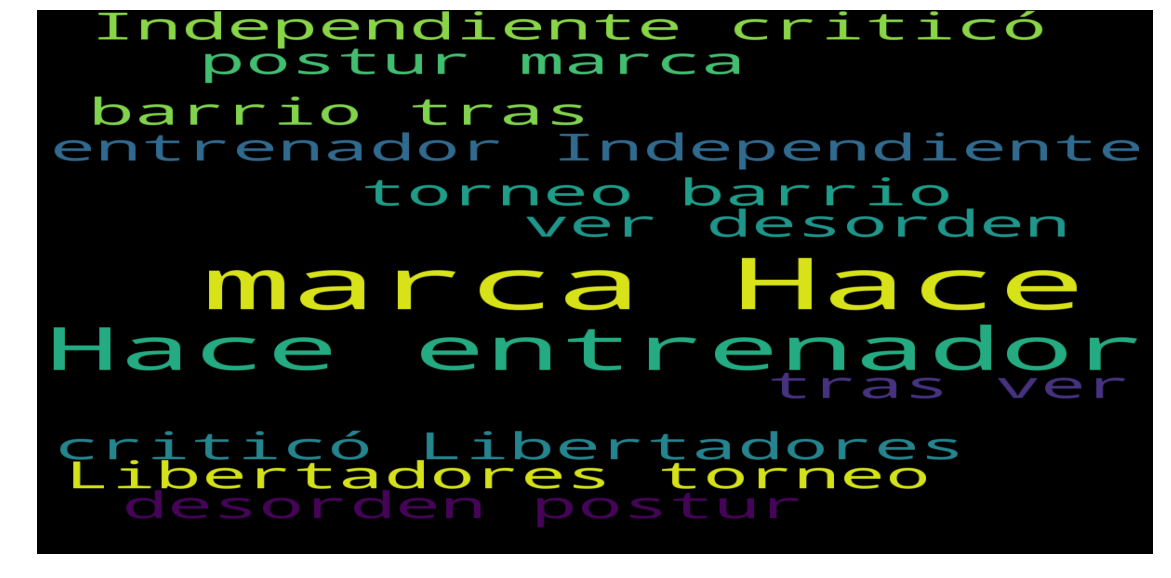

category  7


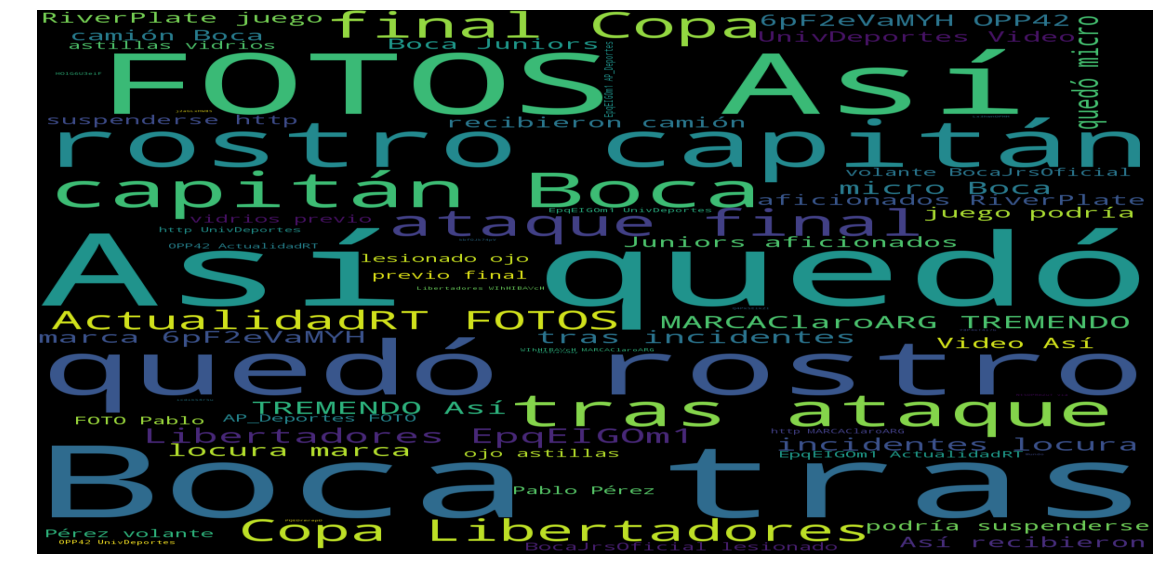

category  8


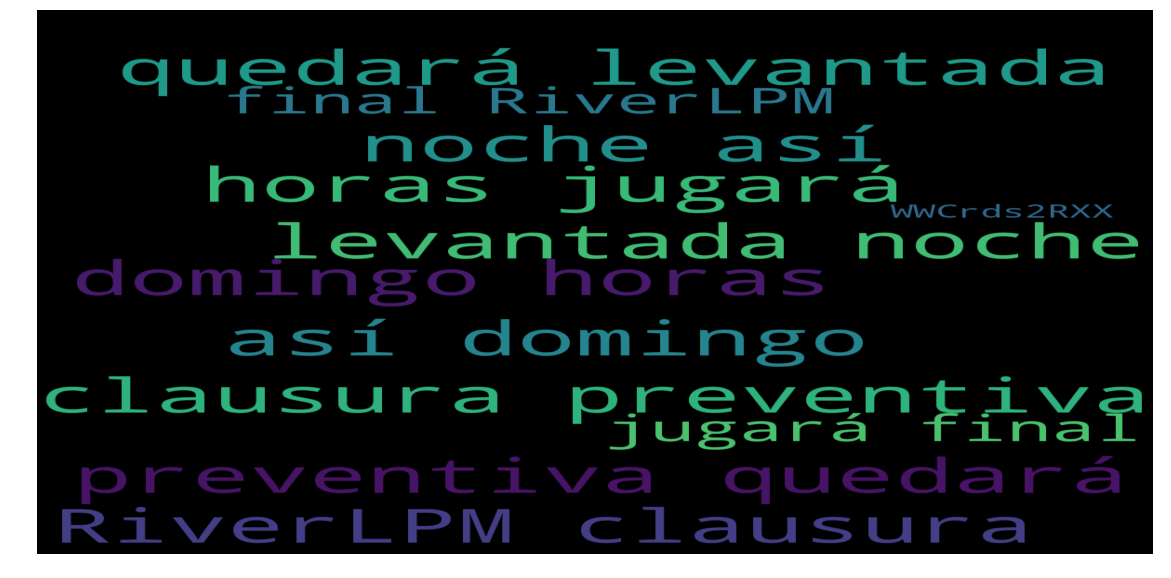

category  9


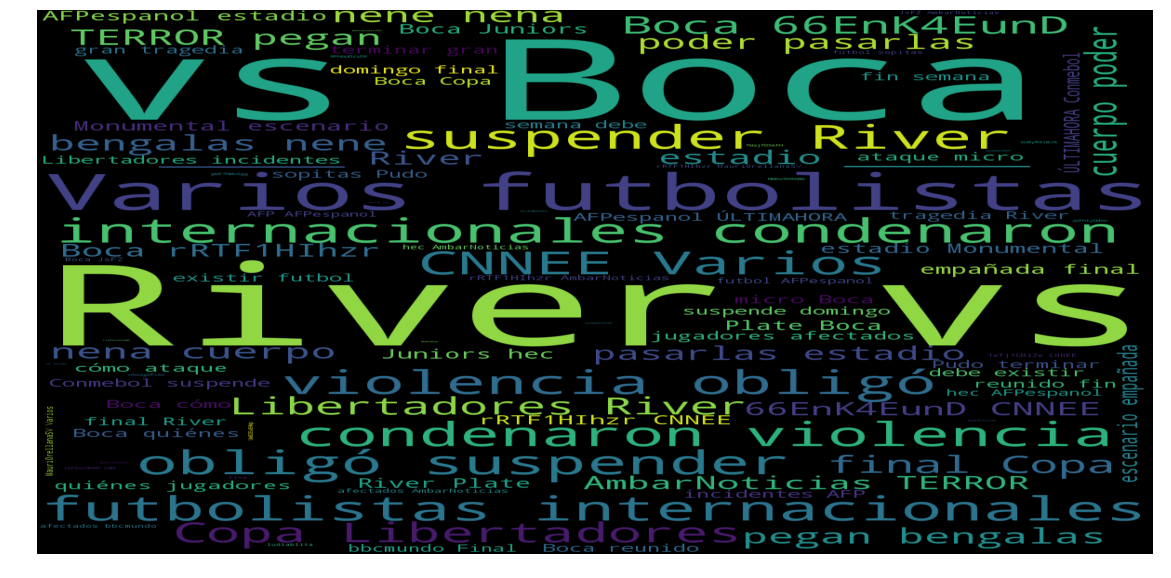

In [0]:
def groupwordcloud(data,category):
    a=np.array(data)

    for  i in set(category):
        print('category ',i)
        wordcloud = WordCloud(width=1200,height=1200,stopwords=stopWords).generate('\n'.join(a[category==i]))
        plt.figure(figsize=(20,10))
        plt.imshow(wordcloud, interpolation='bilinear', aspect='auto')
        plt.axis("off")
        plt.show()


groupwordcloud(dict_['text'],km.labels_)

In [0]:
new_post=dict_['text'][2]


def analyze_new_post(km,new_post):
    print(new_post)
    new_post_vec = vectorizer.transform([new_post])
#    print (new_post_vec)
    # como el resultado es una tupla zip(datos,dtype) obtenemos solo el arreglo
    new_post_label = km.predict(new_post_vec)[0]   

    similar_indices = (km.labels_ == new_post_label).nonzero()[0]

    # hacer una medicion que tanto se parecen los que estan en el mismo cluster

    similar = []
    for i in similar_indices:
        dist = sp.linalg.norm((new_post_vec - vectorized[i]).toarray())  
        similar.append((dist,km.labels_[i], dict_['text'][i]))
    similar = sorted(similar)
    print("Count similar: %i" % len(similar))


    print('.--------------------------------------------------.')
    print(km.cluster_centers_.shape)
    print ((km.cluster_centers_[new_post_label].ravel()))
    dist = sp.linalg.norm((new_post_vec-km.cluster_centers_[new_post_label].ravel()))
    print (dist)
    return similar

similar=analyze_new_post(km,new_post)

#show the more similar post
show_at_1 = similar[0]
print("=== #1 ===")
print(show_at_1)
print()
print('.--------------------------------------------------.')
# show the less similar post
show_at_3 = similar[-1]
print("=== #-1 ===")
print(show_at_3)


@FOXSportsMX debió de haberse suspendido la final de la copa libertadores por falta de garantías a la seguridad dejando al campeón vacante
Count similar: 5053
.--------------------------------------------------.
(10, 3112)
[0.00294494 0.00029983 0.00018027 ... 0.00012769 0.00012769 0.00012769]
0.997057999180852
=== #1 ===
(0.0, 0, '@FOXSportsMX debió de haberse suspendido la final de la copa libertadores por falta de garantías a la seguridad dejando al campeón vacante')

.--------------------------------------------------.
=== #-1 ===
(1.4142135623730951, 0, '📊 #EncuestaLPDT | Pizarreros, los leemos. \n\nLa CONMEBOL reprogramó la Final de la Copa Libertadores para la misma h… https://t.co/9YX9wkwSXm')


**Conclusiones de Clusteirización**

  **1.**  Luego de aplicar la técnica de análisis a múltiples textos de las redes sociales sobre el tema de la final de la copa libertadores,  tenemos grandes grupos de datos sin etiquetar y podemos intentar descubrir nuevas relaciones para dar un buen anaisis y darle una buena utilidad.
  
  **2.** Los clusters son estructuras que influyen la gestión del conocimiento y la innovación.

###Análisis de sentimientos con senti-py

In [0]:
clf = SentimentClassifier()
dict_['sentiment']=[]
start = time.time()
for user,tweet in zip(dict_['user'],dict_['text']):
    value=clf.predict(tweet)
    dict_['sentiment'].append(value)
    #print(user+ ' ==> %.3f' %value + ': '+tweet)
end = time.time()
print("time elapsed",end - start)
print(dict_['user'][2]+ ' ==> %.3f' %dict_['sentiment'][2] + ': '+dict_['text'][2])

time elapsed 670.0794913768768
jlbeltranm ==> 0.022: @FOXSportsMX debió de haberse suspendido la final de la copa libertadores por falta de garantías a la seguridad dejando al campeón vacante


In [0]:
# Structure data in a pandas DataFrame for easier manipulation
df3 = pd.DataFrame(dict_)     
df3.to_csv('senti-py.csv')

#descargar archivo generado
from google.colab import files
files.download('senti-py.csv')

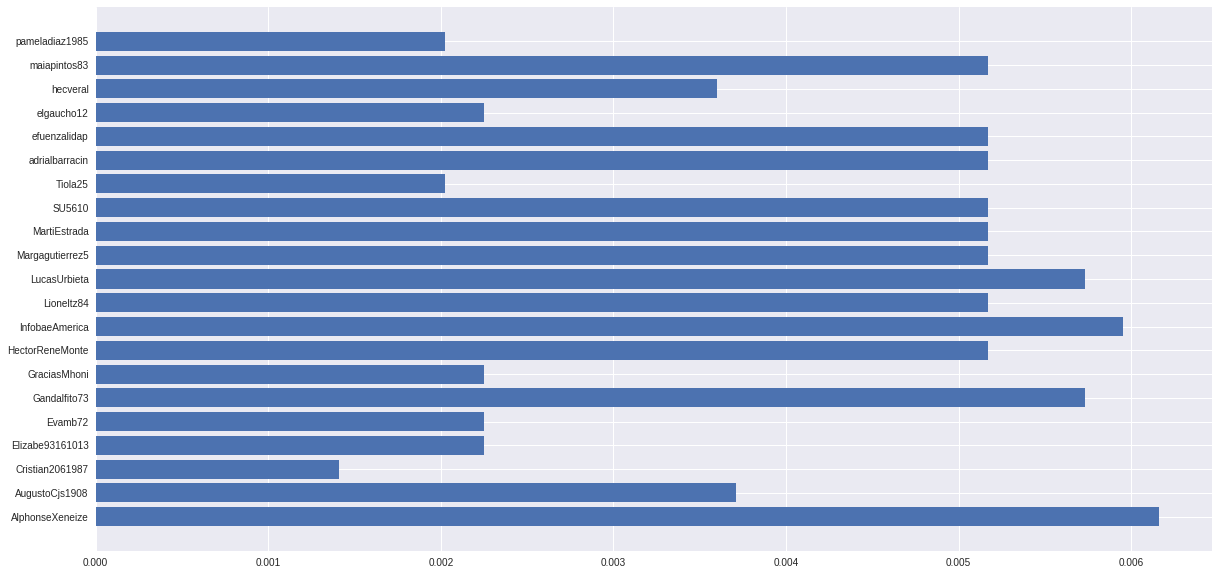

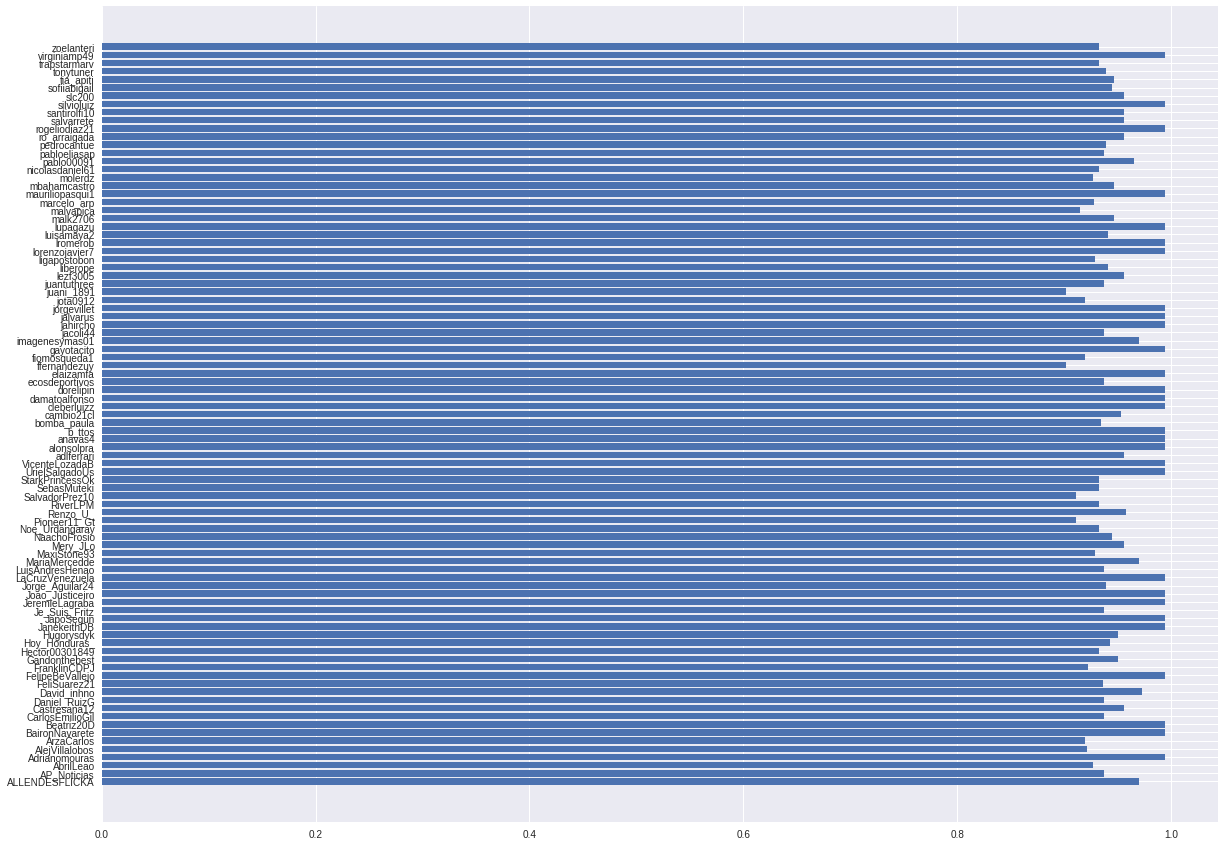

In [0]:
#df = pd.DataFrame(dict_)  
df=df.assign(labels=km.labels_)
df=df.assign(sentiment=dict_['sentiment'])

df2=df.sort_values(by='sentiment') 

plt.figure(figsize=(20,10))
plt.barh(df2['user'][:50], df2['sentiment'][:50])
plt.show()

plt .figure(figsize=(20,15))
plt.barh(df2['user'][-200:], df2['sentiment'][-200:])
plt.show()

### Análisis de sentimientos con [TextBlob](https://textblob.readthedocs.io/en/dev/)


La subjetividad en TextBlob significa que es una medida del sentimiento siendo objetivo a subjetivo,es decir,  va de 0 a 1. Es preferible ver el sentimiento que es objetivo que subjetivo, así que al tener un valor más bajo probablemente se tenga una lectura y analisis más precisa.

In [0]:
new_post=dict_['text'][2]
analysis = TextBlob(new_post)
eng=analysis.translate(to='en')
print(new_post)
print(eng)

@FOXSportsMX debió de haberse suspendido la final de la copa libertadores por falta de garantías a la seguridad dejando al campeón vacante
@FOXSportsMX should have suspended the final of the Copa Libertadores for lack of guarantees to the security that leaves the champion vacant


In [0]:
dict_['subjectivity']=[]
dict_['polarity']=[]
n=len(dict_['user'])
start = time.time()
for i,user,tweet in zip(range(n),dict_['user'],dict_['text']):
  analysis = TextBlob(tweet)
  if i%100==0:
    print(i/n*100)
  try:
    eng=analysis.translate(to='en')
    dict_['polarity'].append(eng.sentiment.polarity)
    dict_['subjectivity'].append(eng.sentiment.subjectivity)  
  except:
    dict_['polarity'].append(float('nan'))
    dict_['subjectivity'].append(float('nan'))
    #print("error in " + tweet )
end = time.time()
print("time elapsed",end - start)

0.0
1.0460251046025104
2.092050209205021
3.1380753138075312
4.184100418410042
5.230125523012552
6.2761506276150625
7.322175732217573
8.368200836820083
9.414225941422593
10.460251046025103
11.506276150627615
12.552301255230125
13.598326359832635
14.644351464435147
15.690376569037657
16.736401673640167
17.782426778242677
18.828451882845187
19.874476987447697
20.920502092050206
21.96652719665272
23.01255230125523
24.05857740585774
25.10460251046025
26.15062761506276
27.19665271966527
28.24267782426778
29.288702928870293
30.334728033472803
31.380753138075313
32.42677824267782
33.47280334728033
34.51882845188285
35.56485355648535
36.61087866108787
37.65690376569037
38.70292887029289
39.74895397489539
40.79497907949791
41.84100418410041
42.88702928870293
43.93305439330544
44.97907949790795
46.02510460251046
47.071129707112966
48.11715481171548
49.163179916317986
50.2092050209205
51.25523012552301
52.30125523012552
53.34728033472803
54.39330543933054
55.43933054393305
56.48535564853556
57.531

In [0]:
print(len(dict_['subjectivity']))

df=df.assign(polarity2=dict_['polarity'])
df=df.assign(subjetivity=dict_['subjectivity'])
df.describe()

9560


favorite_count    sentiment       labels   polarity2  subjetivity
count     9560.000000  9560.000000  9560.000000  890.000000   890.000000
mean         0.712029     0.338701     1.960774    0.024940     0.649917
std         12.911976     0.240196     2.661939    0.224576     0.345137
min          0.000000     0.001409     0.000000   -1.000000     0.000000
25%          0.000000     0.128541     0.000000    0.000000     0.500000
50%          0.000000     0.294236     0.000000    0.000000     0.675000
75%          0.000000     0.548199     3.000000    0.100000     1.000000
max        674.000000     0.994156     9.000000    1.000000     1.000000

In [0]:
df.to_csv('textblob.csv')

#descargar archivo generado
from google.colab import files
files.download('textblob.csv')

In [0]:
from google.colab import files
uploaded = files.upload()

Saving textblob.csv to textblob.csv


0.2703251157296462


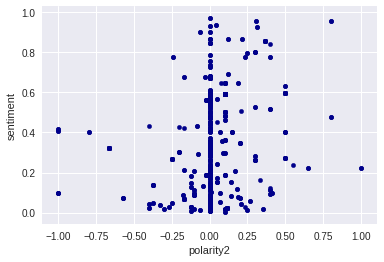

In [0]:
plt.figure(figsize=(20,10))
print(df['polarity2'].corr(df['sentiment']))
ax1 = df.plot.scatter(x='polarity2',y='sentiment',c='DarkBlue')




###Análisis de sentimientos con Vader

In [0]:
sentences = ["VADER is smart, handsome, and funny.",  # positive sentence example
             "VADER is smart, handsome, and funny!",  # punctuation emphasis handled correctly (sentiment intensity adjusted)
             "VADER is very smart, handsome, and funny.", # booster words handled correctly (sentiment intensity adjusted)
             "VADER is VERY SMART, handsome, and FUNNY.",  # emphasis for ALLCAPS handled
             "VADER is VERY SMART, handsome, and FUNNY!!!", # combination of signals - VADER appropriately adjusts intensity
             "VADER is VERY SMART, uber handsome, and FRIGGIN FUNNY!!!", # booster words & punctuation make this close to ceiling for score
             "VADER is not smart, handsome, nor funny.",  # negation sentence example
             "The book was good.",  # positive sentence
             "At least it isn't a horrible book.",  # negated negative sentence with contraction
             "The book was only kind of good.", # qualified positive sentence is handled correctly (intensity adjusted)
             "The plot was good, but the characters are uncompelling and the dialog is not great.", # mixed negation sentence
             "Today SUX!",  # negative slang with capitalization emphasis
             "Today only kinda sux! But I'll get by, lol", # mixed sentiment example with slang and constrastive conjunction "but"
             "Make sure you :) or :D today!",  # emoticons handled
             "Catch utf-8 emoji such as such as 💘 and 💋 and 😁",  
             "eres unico",# emojis handled
             "Not bad at all"  # Capitalized negation
             ]

analyzer = SentimentIntensityAnalyzer()
for sentence in sentences:
    vs = analyzer.polarity_scores(sentence)
    print("{:-<65} {}".format(sentence, str(vs)))

VADER is smart, handsome, and funny.----------------------------- {'neg': 0.0, 'neu': 0.254, 'pos': 0.746, 'compound': 0.8316}
VADER is smart, handsome, and funny!----------------------------- {'neg': 0.0, 'neu': 0.248, 'pos': 0.752, 'compound': 0.8439}
VADER is very smart, handsome, and funny.------------------------ {'neg': 0.0, 'neu': 0.299, 'pos': 0.701, 'compound': 0.8545}
VADER is VERY SMART, handsome, and FUNNY.------------------------ {'neg': 0.0, 'neu': 0.246, 'pos': 0.754, 'compound': 0.9227}
VADER is VERY SMART, handsome, and FUNNY!!!---------------------- {'neg': 0.0, 'neu': 0.233, 'pos': 0.767, 'compound': 0.9342}
VADER is VERY SMART, uber handsome, and FRIGGIN FUNNY!!!--------- {'neg': 0.0, 'neu': 0.294, 'pos': 0.706, 'compound': 0.9469}
VADER is not smart, handsome, nor funny.------------------------- {'neg': 0.646, 'neu': 0.354, 'pos': 0.0, 'compound': -0.7424}
The book was good.----------------------------------------------- {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'co

###Comparación de herramientas de análisis de sentifientos

In [0]:
print(dict_['text'][3])
eng

RT @DiarioOle: El pacto #Superclásico: Boca no quiso jugarlo tras los piedrazos y desde la organización querían que se disputara. Hasta que…


'RT @DiarioOle: The # Superclásico pact: Boca did not want to play it after the stones and from the organization they wanted it to be disputed. Until…'

In [0]:
print("senti-py")
print(dict_['user'][3]+ ' ==> %.3f' %dict_['sentiment'][3] + ': '+dict_['text'][3])

print("\nTextBlob")
try:
  print(eng.sentiment.polarity)
  print(eng.sentiment.subjectivity) 
except:
  print(float('nan'))
  print(float('nan'))
  print("error in " + eng )
print("\nVader")
vs = analyzer.polarity_scores(eng)
print("{:-<65} {}".format(sentence, str(vs)))

senti-py
chetarichards ==> 0.084: RT @DiarioOle: El pacto #Superclásico: Boca no quiso jugarlo tras los piedrazos y desde la organización querían que se disputara. Hasta que…

TextBlob
nan
nan
error in RT @DiarioOle: The # Superclásico pact: Boca did not want to play it after the stones and from the organization they wanted it to be disputed. Until…

Vader
Not bad at all--------------------------------------------------- {'neg': 0.197, 'neu': 0.803, 'pos': 0.0, 'compound': -0.5659}


Con senti-py le da una ponderación de 0.084 siendo una valoracion no positiva y es un poco mas acertivo a un comentario neutro y un poco negativo con Vader, encambio no es determinado por TextBolp

###Conclusiones

**1. **Aunque ambas herrramientas (TextBloB y Vader) son buenas, TextBlob tiene una tarea de procesamiento como la de etiquetado, extraccion de frases , clasificacion  y la traducción que son muy utlites a la hora se hacer procesamiento de analisis de sentimientos, sin embargo  Vader  combina métodos  cualitativos y cuantitativos para construir y validar empíricamente un conjunto de características léxicas junto con su medida asociada de intensidad de sentimiento.

**2.** Nos permite unir la teoría y la práctica, lo cuantitativo y lo cualitativo en métodos mixtos, para presentar analisis pertinentes y necesarios para el desarrollo de las posibles soluciones.
